# Report 9: Global Positioning System

## Jill Annis

### Introduction

##### Stumbledown Algorithm

The "stumbledown" algorithm comprises repeatedly taking randomly generated steps from a current positon and only accepting the steps that are considered better than that current position.  In this case, better means that the new position has a smaller coordinate value than the current position.

##### Stumbledown Reducing Algorithm

The "stumbledown reducing" algorithm consists of keeping track of the number of failed steps (failed means that the new steps were not better than the current position), and reducing the stepsize after a set number of failures.

##### The 2D GPS Problem

All we know is the information that the satellites are sending us; we don't actually know our location given by (x,y).  The satellite data is used to make our best guess as to where our actual location is.  The satellites we will use are given by the x position, the y position, and their actual reporting distance from our location, d.

* Satellite 1:
    * x: 567
    * y: 390
    * d: 366.9
 
* Satellite 2:
    * x: 73.2
    * y: 499.5
    * d: 444.9

* Satellite 3:
    * x: 204
    * y: 501
    * d: 386

* Satellite 4:
    * x: 337.3
    * y: 609.3
    * d: 480.5
    
* Satellite 5:
    * x: 368.5
    * y: 116.3
    * d: 57.0
    
The calculated distance of a location (x,y) from a satellite, i, is given by: $calculated_i = \sqrt{(x-x_i)^2+(y-y_i)^2}$.

The mismatch between a satellite, i, and a location (x,y) is given by the difference between the calculated distance and the actual reported satellite distance: $mismatch_i = calculated_i-d_i$

Thus, the GPS error is given by the sum of the mismatches of all the satellites.  To make sure the error is positive, the mismatches are squared.  $Error = \sum_{i=1}^5 (mismatch_i)^2$

Finding this unknown location (x,y) can now be considered an optimization problem where the error is minimized.

### Task Statement

In this report there are several exercises to complete:

* Exercise 1: Write a function that implements the "stumbledown" algorithm and use it to find the minimum of the function $f(x,y) =(x-5)^2+(y-3)^2+17$.  Then, write a function that prints the step number, whether the step was a success or failure, and the values x, y, and f(x,y).

* Exercise 2: Write a function that implements the "stumbledown with reducing step size" algorithm and use it to find the minimum of the same function from exercise 1.  Then, write a function that plots both the level curves of this function and the steps taken by the algorithm as it approaches the minimum of the function on the same graph and the final location.

* Exercise 3: First, explain briefly how GPS works.  Then, apply the algorithm from exercise 2 to find the solution to the 2D GPS problem described above to 8 significant figures.  To do this, a function that calculates the error between the calculated distance and the distance the satellites are reporting must be created.  Finally, plot the steps the algorithm takes and the final location.

### Method and Results

In [1]:
%pylab inline
from numpy.random import rand

Populating the interactive namespace from numpy and matplotlib


#### Exercise 1

In [2]:
def testf(x,y): #this will be passed into the stumbledown functions as an argument
    f=(x-5)**2+(y-3)**2+17 #function to be minimized
    return f

In [3]:
def stumbledown(f, p, stepsize, nsteps): #p is 2 element array
    
    points=empty((nsteps,4)) #array created to hold all of the points tested
    points[0]=[*p,f(*p),True] #initialize the points array with the initial point, p
    
    for i in range(1,nsteps):
        step=rand(2)*2*stepsize-stepsize #rand(2) for x and y; 2*stepsize to scale interval; -stepsize to shift to center on zero
        q=p+step
        if f(*q)<f(*p):
            p=q
            points[i]=[*p,f(*p),True]
        else:
            points[i]=[*p,f(*p),False]
    
    return points

The **stumbledown** function implements the "stumbledown" algorithm described in the introduction. The function takes 4 arguments: f which is the function to be minimized, p is the initial point (x,y), stepsize is the maximum stepsize used to find the next position, and nsteps which is the number of steps the function will run through.  For each step in  nsteps, the function calculates a random step in both the x and y directions then adds this random step to the initial point p, and this new point is called q.  Then, if f(q) is less than f(p), the point q becomes the new p, and the point is stored as a success (in this case success=True).  If this is not the case, the point is stored as a failure, and q is ignored.  After looping through nsteps, all of the stored points are returned.

In [4]:
def print_stumbledown(*args): #*args is used to pass in any number of arguments, here it will be the same 4 as in stumbledown
    print("{:8}{:12}{:11}{:10}{}".format("Steps","Success","x","y","f(x,y)"))
    print("_________________________________________________")
    
    info=stumbledown(*args) #info is equal to the points array from stumbledown
    
    for i in range(args[3]): #args[3] is the stepsize
        if info[i,3]==True:
            Success="Yes"
        else:
            Success="   "
        
        print("{:2}{:>11}{:11.3f}{:11.3f}{:13.3f}".format(i,Success,info[i,0],info[i,1],info[i,2]))

**print_stumbledown** is used to print the points array created in by the **stumbledown** function.  This function prints the step number, whether the step was a success or failure, and the values of x, y, and f(x,y).  To change the True and False values in the points array into "Yes" or a blank space, a for loop is used to loop through the column that holds these values (here it is the 4th column that has an index of 3).

Below shows the implementation of **print_stumbledown** with the following arguments: the function to be minimized is the testf function, the initial point is (0,0), the initial stepsize is 5, and there are 75 steps.

In [21]:
P=array([0,0])
print_stumbledown(testf,P,5,75)

Steps   Success     x          y         f(x,y)
_________________________________________________
 0        Yes      0.000      0.000       51.000
 1                 0.000      0.000       51.000
 2        Yes      0.990      4.731       36.073
 3                 0.990      4.731       36.073
 4                 0.990      4.731       36.073
 5                 0.990      4.731       36.073
 6                 0.990      4.731       36.073
 7                 0.990      4.731       36.073
 8                 0.990      4.731       36.073
 9                 0.990      4.731       36.073
10        Yes      5.480      2.658       17.347
11                 5.480      2.658       17.347
12                 5.480      2.658       17.347
13                 5.480      2.658       17.347
14                 5.480      2.658       17.347
15                 5.480      2.658       17.347
16                 5.480      2.658       17.347
17                 5.480      2.658       17.347
18                 5

After 75 steps, the **stumbledown** function gives the minimum of the function testf as (5.1,3.2) with f(5.1,3.2)=17.1. Just by examining the testf function, we can clearly see that the minimum occurs at (5,3) and f(5,3)=17. Therefore, the **stumbledown** algorithm comes within a few tenths of the actual answer, and so it can be concluded that this algorithm is not the most accurate method in finding the minimum of a function.

Also, in the 75 steps run, only 4 were considered a success, and this fact further contributes to the point that the algorithm is not a solid and reliable method. More successes are needed if we want to get closet to the actual x, y, and f(x,y) values. Exercise 2 uses a modified "stumbledown" method that proves to be more accurate.

#### Exercise 2

In [22]:
def stumbledown_reducing(f, p, stepsize, nsteps):
    
    points=empty((nsteps,4))
    points[0]=[*p,f(*p),True]
    
    i=1 #variable to store the current step
    counter=0 #counts the number of fails
    factor=0.5 #factor to decrease the stepsize by
    tolerance=10**(-8)
    nfails=5 #number of fails allowed before the stepsize is decreased
    multiplier=0
    StepSize=stepsize #initialize the stepsize
    
    while StepSize>tolerance and i<nsteps:
        StepSize=stepsize*(factor**multiplier)
        step=rand(2)*2*StepSize-StepSize
        q=p+step
        if f(*q)<f(*p):
            p=q
            points[i]=[*p,f(*p),True]
        else:
            points[i]=[*p,f(*p),False]
            counter+=1
        if counter==nfails:
            multiplier+=1
            counter=0 #reset the counter after reaching nfails
        i+=1
                
    return points[:i]

This **stumbledown_reducing** function implements the improved "stumbledown" algorithm. In this version, the code runs while two conditions are true: the current stepsize is greater than a defined tolerance value and the current step is less than the maximum amount of steps to be run. The major difference between the two algorithms can be seen in the line directly under the while statement; the stepsize becomes dependent upon the number of fails. As each new step and corresponding point q is calculated, the code keeps track of how many fails have occured for the current stepsize.  If f(q) is less than f(p), then the step is a success, and the point is recorded into the points array and q becomes the new p.  However, if the step is a failure, not only is the point recorded, but the fail counter is increased by 1.  When the number of failures reaches 5 (the counter equals 5), a multiplier is introduced into the equation that calculates the stepsize. Initially, the multiplier is 0, so the stepsize is whatever it was initialized to.  When the multiplier is increased to 1 (or any other number besides 0), the stepsize is multiplied by a factor that decreases the stepsize by the amount factor^multiplier.  In this case, the stepsize is continuously cut in half (since the factor is 0.5) each time the multiplier increases.  When one of the while conditions becomes False, the function returns the point array.

In [23]:
def print_stumbledown_reducing(*args):
    print("{:8}{:12}{:11}{:10}{}".format("Steps","Success","x","y","f(x,y)"))
    print("_________________________________________________")
    
    info=stumbledown_reducing(*args) #this is the line that has been changed from print_stumbledown
    
    for i in range(args[3]):
        if info[i,3]==True:
            Success="Yes"
        else:
            Success="   "
        
        print("{:2}{:>11}{:11.3f}{:11.3f}{:13.3f}".format(i,Success,info[i,0],info[i,1],info[i,2]))

This function **print_stumbledown_reducing** uses the same code as **print_stumbledown**, with the only difference being that the **stumbledown_reducing** function is used instead of the **stumbledown** function.

In [35]:
def plot_stumbledown(*args):
    info=stumbledown_reducing(*args) #the points array
    location=info[:,:2] #this is an extra, unecessary step, but I use it for my own understanding of what is going on
    x=location[:,0] #slice out x coordinates
    y=location[:,1] #slice out y coordinates
    xpts=linspace(0,6,100)
    ypts=linspace(0,6,100)
    X,Y=meshgrid(xpts,ypts) #x and y points for the contour plot
    Z=testf(X,Y) #assign testf to a variable
    title("Contour Plot and Algorithm Steps")
    xlabel("x")
    ylabel("y")
    plot(x,y, color='k') #plot steps
    plot(x[-1],y[-1], 'ko') #plot final step location
    contourf(X,Y,Z, cmap='BuPu') #contour plot; I was persuaded to not use cmap="Dark2" so your very lucky this time :D
    colorbar();

**plot_stumbledown** is a function that plots both the steps taken by the "stumbledown reducing" algorithm and the level curves of the testf function. To plot the algorithm steps, the "location" information is sliced from the points/info array.  The location data is only the x and y coordinates from the points array returned from **stumbledown_reducing**.  Then, the x and y coordinates are placed into their own separate arrays. To actually plot the steps taken on the graph, a call to plot is made using the x and y coordinate arrays. The final location is indicated on the graph as a black filled-in circle.  Next, we must create the contour plot of the function testf. The X and Y points used in the contour plot function are created by using the linspace and meshgrid functions.  Then, an array Z is created to hold the values of testf(X,Y).  All three arrays (X,Y,Z) are then used along with contourf to create a filled-in contour plot.  A call to colorbar is also used to define what value each color represents.

In [31]:
P=array([0,0])
print_stumbledown_reducing(testf,P,5,75) #(function, initial point, initial stepsize, number of steps)

Steps   Success     x          y         f(x,y)
_________________________________________________
 0        Yes      0.000      0.000       51.000
 1                 0.000      0.000       51.000
 2                 0.000      0.000       51.000
 3                 0.000      0.000       51.000
 4        Yes      2.419      2.551       23.865
 5                 2.419      2.551       23.865
 6                 2.419      2.551       23.865
 7                 2.419      2.551       23.865
 8        Yes      4.346      3.883       18.208
 9                 4.346      3.883       18.208
10                 4.346      3.883       18.208
11                 4.346      3.883       18.208
12                 4.346      3.883       18.208
13                 4.346      3.883       18.208
14        Yes      4.299      2.853       17.513
15                 4.299      2.853       17.513
16        Yes      4.922      2.328       17.458
17                 4.922      2.328       17.458
18                 4

**print_stumbledown_reducing** allows us to see how much better the "stumbledown reducing" algorithm is compared to the original "stumbledown" algorithm.  After 75 steps, the improved algorithm actually reaches the actual values of (5,3) and f(5,3)=17 as opposed to being a few decimal places off.  Also, there are significantly more successful steps than the other algorithm, and this, along with the decreasing step size, is what allows the "stumbledown reducing" algorithm to be much more accurate.

Below, the contour plot for testf and the steps taken are plotted together.

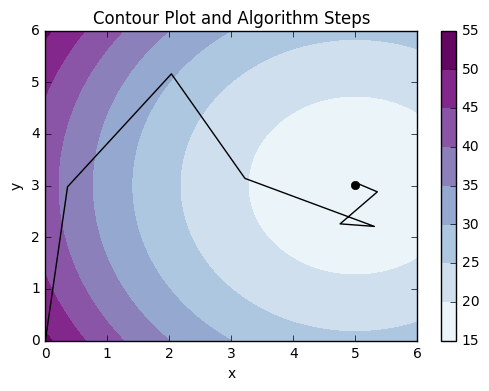

In [41]:
P=array([0,0])
plot_stumbledown(testf,P,3,100)#(function, initial point, initial stepsize, number of steps)

Above is the result of the **plot_stumbledown** function. After 100 steps, the algorithm ends up at approximately x=5 and y=3, as indicated by the black dot, which is the (x,y) location of the minimum of testf.  Also, we can tell that we have reached the minimum value of f(x,y)=17 because the black dot ends up roughly in the middle of the circle that represents lowest values according to the colorbar (values between 15 and 20).

#### Exercise 3

How GPS Works!

The Global Positioning System (GPS) is made up of at least 24 satellites orbiting above Earth at 20,350km.  Each satellite orbits the Earth twice a day in one of 6 pre-determined paths, and this is what allows for continuous coverage worldwide.  A minimum of 4 satellites are needed to correctly determine position.

Steps:

1) The satellites continuously broadcast with radio waves their location and time using very precise atomic clocks.

2) The radio waves travel through space at the speed of light to a GPS receiver on Earth's surface.

3) The receiver records the time that the radio waves arrive, and uses this along with the times reported by the atomic clocks to calculate the distance from each satellite.  Distance = speed of light x (time of atomic clock - recorded receiver time)

4) When the receiver knows its distance from at least 4 satellites, it can use the appropriate geometry to determine its 3-dimentional position on Earth.

In [48]:
def gps_error(x,y):
    satellite=array([[567,390.7,366.9],[73.2,499.5,444.9],[204,501,386],[337.3,609.3,480.5],[368.5,116.3,57.0]]) #[x,y,d]

    calculated1=sqrt((x-satellite[0,0])**2+(y-satellite[0,1])**2)
    mismatch1=(calculated1-satellite[0,2])**2
    
    calculated2=sqrt((x-satellite[1,0])**2+(y-satellite[1,1])**2)
    mismatch2=(calculated2-satellite[1,2])**2
    
    calculated3=sqrt((x-satellite[2,0])**2+(y-satellite[2,1])**2)
    mismatch3=(calculated3-satellite[2,2])**2
    
    calculated4=sqrt((x-satellite[3,0])**2+(y-satellite[3,1])**2)
    mismatch4=(calculated4-satellite[3,2])**2
    
    calculated5=sqrt((x-satellite[4,0])**2+(y-satellite[4,1])**2)
    mismatch5=(calculated5-satellite[4,2])**2
    
    mismatch_error=sum([mismatch1,mismatch2,mismatch3,mismatch4,mismatch5])
    
    return mismatch_error

**gps_error** is a function that returns the error for any (x,y) position based on the mismatch between the calculated and actual distances of each satellite.  The calculated satellite distance is defined above as calculated#, and the actual distance of each satellite is represented in the satellite array.  The exact steps to find the mismatch error is described in great detail in the introduction.

In [49]:
def print_gps(*args):
    Info=stumbledown_reducing(*args) #points array
    Location=Info[:,:3]
    X=Location[:,0] #slice out x coordinates
    Y=Location[:,1] #slice out y coordinates
    print("Final x location:", X[-1]) #print final x
    print("Final y location:", Y[-1]) #print final y
    plot(X,Y, color='purple')
    plot(X[-1],Y[-1], 'ko');

The **print_gps** function is just a modified version of the **plot_stumbledown** function.  The function pulls out the x and y coordinates from the points array created by the **stumbledown_reducing** function.  The path of the algorithm is plotted as a purple line with a black filled-in circle marking the final position.  Additionally, this function prints the final x and y position.

The code below plots both the algorithm path and the circles around each satellite.  The center of each circle is given by the x and y coordinates of each satellite, and the radius of each circle is the actual distance of each satellite given in the satellite array.  In the **print_gps** function, a large stepsize of 400 and 1000 steps are used in order to ensure that **stumbledown_reducing** works correctly and produces the most accurate result as possible.  Also, the initial point used in **stumbledown_reducing** is (500,500).  Given the locations and distances of each satellite, it did not make sense to me to start at (0,0).

Final x location: 312.766386086
Final y location: 128.162492634


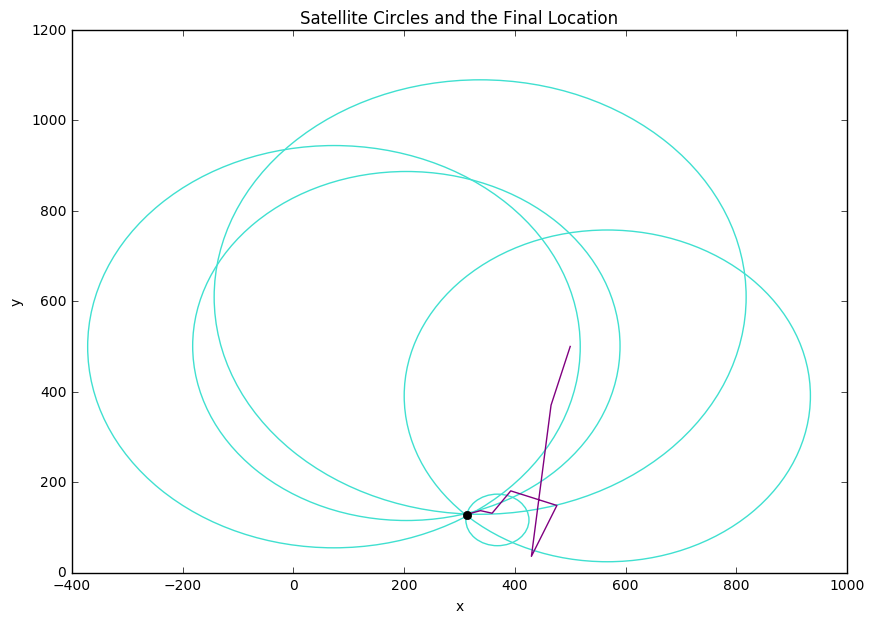

In [50]:
satellite=array([[567,390.7,366.9],[73.2,499.5,444.9],[204,501,386],[337.3,609.3,480.5],[368.5,116.3,57.0]])
P=array([500,500]) #starting point
figure(figsize=(10,7))
title("Satellite Circles and the Final Location")
xlabel("x")
ylabel("y")
for satellites in satellite: #plots a circle of radius d around each satellite
    gca().add_patch(Circle((satellites[0],satellites[1]), radius=satellites[2], fc='none', ec='turquoise'))
print_gps(gps_error,P,400,1000)

The graph above has the circles surrounding each satellite and the algorithm path.  It is clear that the circles intersect each other near the same point (they don't overlap exactly), and that the final position of the "stumbledown reducing" algorithm is located almost exactly on the circles' intersection point.  Therefore, we can conclude that our actual location is somewhere near the point (313,128) (these numbers are printed above the graph).

### Conclusion

In this report, several tasks were accomplished.  First, both stumbledown algorithms were implemented and used to find the minimum of the function $f(x,y) =(x-5)^2+(y-3)^2+17$.  In doing this, we discovered that the "stumbledown reducing" algorithm is much more accurate that the original "stumbledown" algorithm.  Then, we briefly explored how GPS actually works.  Finally, we used the "stumbledown reducing" algorithm to find an approximate solution to the 2D GPS problem described in the introduction.

### References

GPS info: http://www.gps.gov/multimedia/poster/